In [ ]:
# https://blog.naver.com/PostView.nhn?blogId=garden2040&logNo=221443844433
# 위 블로그를 따라서 mnist 자료를 확인해 본다.
# 2024.06.25 한희정

In [2]:
import os
import struct
import numpy as np


def read(dataset = "training", path = "."):

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    get_img = lambda idx: (lbl[idx], img[idx])

    mnist_data = []
    for i in range(len(lbl)):
        mnist_data.append(get_img(i))
    return mnist_data


def show(image):
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()
### [출처] 파이썬 MNIST 데이터셋 다운로드 후 살펴보기|작성자 김동현

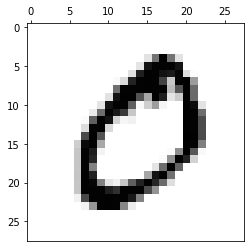

In [7]:
mnist2 = read("training", path="./mnist_unzip")
show(mnist2[1][1])

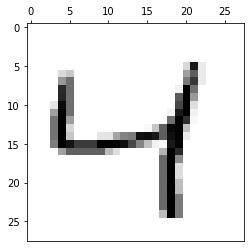

In [8]:
show(mnist2[2][1])